In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

training_file_path = "./IA2-train.csv"
validation_file_path = "./IA2-dev.csv"

df_train = data_preprocessing(training_file_path)
df_val = data_preprocessing(validation_file_path)

df_train, df_val = feature_normalization(df_train, df_val)

# separate X and Y
X_train, Y_train = separate_X_Y(df_train)
X_val, Y_val = separate_X_Y(df_val)


def data_preprocessing(csv_file_path):
  '''
  :param csv_file_path: str, training or validation csv file path
  :return: processed df
  '''
  df = pd.read_csv(csv_file_path)

  return df


def separate_X_Y(df):
  '''
  :param df: processed data
  :return: X: np 2d array, N*d
           Y: np 1d array, 1*N
  '''
  if 'Response' in df:
    df_Y = df['Response']
    df_X = df.drop('Response', axis=1)
    return df_X.to_numpy(), df_Y.to_numpy()
  else:
    return df.to_numpy(), None


def feature_normalization(df_train, df_val):
  '''
  :param df_train: df, training data after preprocessing
  :param df_val: df, validation or test data after preprocessing
  :return: df_train and df_val after normalization of z score
  '''

  # apply z-score to all the columns except "dummy" & "waterfront" & "price"
  columns_applied = ['Annual_Premium', 'Age', 'Vintage']

  # data processing
  # preprocess training data
  df_applied_train = df_train[columns_applied]

  train_mean = mean(df_applied_train)
  train_std = std(df_applied_train)
  df_z_score_train = (df_applied_train - train_mean) / train_std
  df_train.update(df_z_score_train)

  # preprocess validation data
  df_applied_val = df_val[columns_applied]
  df_z_score_val = (df_applied_val - train_mean) / train_std
  df_val.update(df_z_score_val)

  return df_train, df_val


def mean(df):
  return df.mean()

def std(df):
  return df.std()

def z_score(df, mean, std):
  return (df - mean) / std


# calculate loss here -- loss function
def sigmoid(z): 
  return 1 / (1 + np.exp(-z))
    
def LR_l2(X, Y, iter_num, lamda, alpha):  
    
  # print(predict_0)
  # print(-np.sum(predict_1 + predict_0) / X.shape[0] + lamda * np.sum((w**2)))

  iter_count = 0
  # w = np.random.rand(X.shape[1])
  w = np.ones(X.shape[1])
  loss_values = []

  while iter_count < iter_num: # and loss_function(X, Y, w, lamda) < epsilon:
    iter_count += 1
    # print(delta_w(X,Y,w))
    # print(w)
    predict_1 = Y * np.log(y_hat(X, w))
    predict_0 = (1 - Y) * np.log(1 - y_hat(X, w))
    w = w + alpha * delta_w(X, Y, w)
    w = w - alpha * lamda * w
    loss_value = -np.sum(predict_1 + predict_0) / X.shape[0] + lamda * np.sum((w**2))
    # print(w)
    # print(loss_function_l2(X, Y, w, lamda))
    loss_values.append(loss_value)

  return w, loss_values

def y_hat(X, w):
  '''
  :param X: np 2d array, N*d, the training data
  :param w: np 1d array, 1*d, the learned parameters
  :return: y_hat, np 1d array, 1*N, the computed y (predicted y)
  '''

  return sigmoid(np.dot(X, w))

def delta_w(X, Y, w):
  '''
  :param X: np 2d array, N*d, training data
  :param Y: np 1d array, 1*N, ground truth
  :param w: np 1d array, 1*d, parameters learned for each iteration
  :return: delta_w, gradient for MSE, used to update w for each iteration
  '''

  return 1 / Y.shape[0] * np.dot(( Y - y_hat(X, w)), X)


# def plot_loss_vs_iter(df_iter_mse, MSE_plot_save_path, learning_rate):
#   '''
#   :param df_iter_mse: df, contains iteration number and MSE value
#   :param MSE_plot_save_path: str, the file name to save the line plot
#   :param learning_rate: the used learning rate
#   :return: none, save lineplot to the file path
#   '''

#   plt.clf()
#   iter_mse = sns.lineplot(data=df_iter_mse, x="iter", y="loss").set_title('learning rate: ' + str(learning_rate))
#   fig_iter_mse = iter_mse.get_figure()
#   fig_iter_mse.show()
#   # fig_iter_mse.savefig(MSE_plot_save_path)


def plot_accuracy_vs_lamda(df_lamda_accuracy, accuracy_plot_save_path, train_or_val):
  '''
  :param df_lamda_accuracy: df, contains accuracy and lamda value (regularization term)
  :param accuracy_plot_save_path: str, the file name to save the line plot
  :param regularization_term: the used regularization term
  :return: none, save lineplot to the file path
  '''

  plt.clf()
  lamda_accuracy = sns.lineplot(data=df_lamda_accuracy, x="regularization_lamda", y="accuracy").set_title(train_or_val)
  fig_lamda_accuracy = lamda_accuracy.get_figure()
  fig_lamda_accuracy.savefig(accuracy_plot_save_path)


def plot_w_zeros_vs_lamda(df_lamda_w_zeros, w_zeros_plot_save_path):
  '''
  :param df_lamda_accuracy: df, contains accuracy and lamda value (regularization term)
  :param accuracy_plot_save_path: str, the file name to save the line plot
  :param regularization_term: the used regularization term
  :return: none, save lineplot to the file path
  '''

  plt.clf()
  lamda_w_zeros = sns.lineplot(data=df_lamda_w_zeros, x="regularization_lamda", y="w_zeros").set_title("weights_zeros_vs_lamda")
  fig_lamda_w_zeros = lamda_w_zeros.get_figure()
  fig_lamda_w_zeros.savefig(w_zeros_plot_save_path)





--------------------
lamda =  0.0001
Index(['Policy_Sales_Channel_157', 'Region_Code_34', 'Region_Code_51',
       'Policy_Sales_Channel_40', 'Policy_Sales_Channel_56'],
      dtype='object')
--------------------
lamda =  0.001
Index(['Policy_Sales_Channel_157', 'Region_Code_34', 'Region_Code_51',
       'Policy_Sales_Channel_40', 'Policy_Sales_Channel_56'],
      dtype='object')
--------------------
lamda =  0.01
Index(['Policy_Sales_Channel_157', 'Region_Code_34',
       'Policy_Sales_Channel_156', 'Region_Code_51',
       'Policy_Sales_Channel_40'],
      dtype='object')
--------------------
lamda =  0.1
Index(['Vehicle_Damage', 'Previously_Insured', 'Policy_Sales_Channel_157',
       'dummy', 'Policy_Sales_Channel_156'],
      dtype='object')
--------------------
lamda =  1.0
Index(['Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_1',
       'Policy_Sales_Channel_152', 'Age'],
      dtype='object')
--------------------
lamda =  10.0
Index(['Vehicle_Damage', 'Previously_Insured'

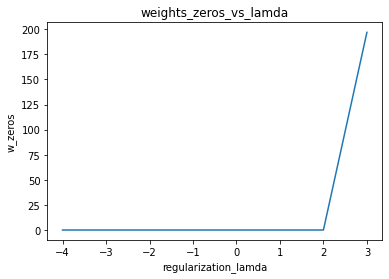

In [7]:


iter_num = math.pow(10, 4)
# epsilon = math.pow(10, -6)
# learning rate
alpha = math.pow(10, -2)
# regularization parameter
# lamda = math.pow(10, -1)

# # Model training
# w, loss_values = LR_l2(X_train, Y_train, iter_num, lamda, alpha)
# print(loss_values[-1])

# y_predicted = [1 if x >= 0.5 else 0 for x in y_hat(X_val, w)]

# if Y_val is not None:
#     accuracy = np.count_nonzero(Y_val == y_predicted) / Y_val.shape[0]
#     print(accuracy)

w_zeros_plot_save_path = "./plots/w_zeros.jpg"
zeros = []

for i in range(-4, 4):
    iter_num = math.pow(10, 4)
    # learning rate
    alpha = math.pow(10, -3)
    # regularization parameter
    lamda = math.pow(10, i)

    # Model training
    w, _ = LR_l2(X_train, Y_train, iter_num, lamda, alpha)

    # if i in range(-4, -1):
    w_absolute = np.absolute(w)
    top_value_indice = w_absolute.argsort()[-5:][::-1]
    top_5_feature_names = df_train.columns[top_value_indice]
    print("--------------------")
    print("lamda = ", lamda)
    print(top_5_feature_names)

    
    n_zeros = np.count_nonzero(w==0)
    zeros.append(n_zeros)

dict_w = {
    'regularization_lamda': list(range(-4,4)),
    'w_zeros': zeros
}

df_w_zeros = pd.DataFrame(dict_w)
plot_w_zeros_vs_lamda(df_w_zeros, w_zeros_plot_save_path)


# dict = {
#     'y_predicted': y_predicted,
#     'Y_val': Y_val
# }
# df_pred = pd.DataFrame(dict)
# df_pred.to_csv('./pred.csv')



# acc_train_plot_save_path = './plots/train_acc.jpg'
# acc_val_plot_save_path = './plots/val_acc.jpg'

# acc_train = []
# acc_val = []

# for i in range(-3,4):
#     iter_num = math.pow(10, 4)
#     # learning rate
#     alpha = math.pow(10, -2)
#     # regularization parameter
#     lamda = math.pow(10, i)

#     # Model training
#     w, _ = LR_l2(X_train, Y_train, iter_num, lamda, alpha)

#     y_predicted_train = [1 if x >= 0.5 else 0 for x in y_hat(X_train, w)]
#     y_predicted = [1 if x >= 0.5 else 0 for x in y_hat(X_val, w)]

#     accuracy_train = np.count_nonzero(Y_train == y_predicted_train) / Y_train.shape[0]
#     accuracy_val = np.count_nonzero(Y_val == y_predicted) / Y_val.shape[0]

#     acc_train.append(accuracy_train)
#     acc_val.append(accuracy_val)


# dict_train = {
#     'regularization_lamda': list(range(-3,4)),
#     'accuracy': acc_train
# }
# dict_val = {
#     'regularization_lamda': list(range(-3,4)),
#     'accuracy': acc_val
# }

# df_train_acc = pd.DataFrame(dict_train)
# df_val_acc = pd.DataFrame(dict_val)

# plot_accuracy_vs_lamda(df_train_acc, acc_train_plot_save_path, "training_accuracy")
# plot_accuracy_vs_lamda(df_val_acc, acc_val_plot_save_path, "validation_accuracy")
